In [3]:
pip install pycountry

  Created wheel for pycountry: filename=pycountry-19.8.18-py2.py3-none-any.whl size=10627366 sha256=74358fe88cceb42f7047e31637572a1e2b2bbad62c03233f7ac50cef5b9f6992
  Stored in directory: C:\Users\prana\AppData\Local\pip\Cache\wheels\a2\98\bf\f0fa1c6bf8cf2cbdb750d583f84be51c2cd8272460b8b36bd3
Successfully built pycountry
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install wbdata

  Created wheel for wbdata: filename=wbdata-0.2.7-cp37-none-any.whl size=15721 sha256=2eec9ff999d00111c9f903550ac35d18abd3ae437213ce77a5c00a8cdc8a028d
  Stored in directory: C:\Users\prana\AppData\Local\pip\Cache\wheels\57\61\6a\3978e90cf2f9443b94ce56b4fa839850da9076e697be3a27e3
Successfully built wbdata
Note: you may need to restart the kernel to use updated packages.


In [40]:
import pandas as pd
import pycountry
import wbdata
import datetime
import statsmodels.formula.api as smf
import numpy as np
import pylab
import matplotlib
import matplotlib.pyplot as plt

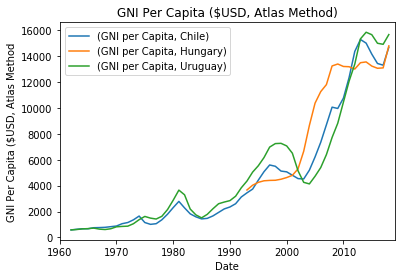

In [41]:
import wbdata
import pandas
import matplotlib.pyplot as plt
 
#set up the countries I want
countries = ["CL","UY","HU"]
 
#set up the indicator I want (just build up the dict if you want more than one)
indicators = {'NY.GNP.PCAP.CD':'GNI per Capita'}
 
#grab indicators above for countires above and load into data frame
df = wbdata.get_dataframe(indicators, country=countries, convert_date=False)

#df is "pivoted", pandas' unstack fucntion helps reshape it into something plottable
dfu = df.unstack(level=0)

# a simple matplotlib plot with legend, labels and a title
dfu.plot(); 
plt.legend(loc='best'); 
plt.title("GNI Per Capita ($USD, Atlas Method)"); 
plt.xlabel('Date'); plt.ylabel('GNI Per Capita ($USD, Atlas Method');

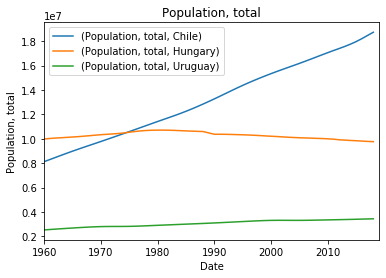

In [43]:
import wbdata
import pandas
import matplotlib.pyplot as plt
 
#set up the countries I want
countries = ["CL","UY","HU"]
 
#set up the indicator I want (just build up the dict if you want more than one)
indicators = {'SP.POP.TOTL':'Population, total'}
 
#grab indicators above for countires above and load into data frame
df1 = wbdata.get_dataframe(indicators, country=countries, convert_date=False)

#df is "pivoted", pandas' unstack fucntion helps reshape it into something plottable
dfu1 = df1.unstack(level=0)

# a simple matplotlib plot with legend, labels and a title
dfu1.plot(); 
plt.legend(loc='best'); 
plt.title("Population, total"); 
plt.xlabel('Date'); plt.ylabel('Population, total');

In [44]:
def merge_df_onCode(df_data1, df_data2):
    """Merge two data frames on Code column, drop double country column
    :param df_data1: data frame
    :param df_data2: data frame
    :returns df_joined: data frame"""
    df_joined = pd.merge(df_data1, df_data2, on='Code')
    df_joined.drop(['Country_y'], axis=1, inplace=True)
    return df_joined

#merge data
merge_data = merge_df_onCode(df,df1)

#rename column label
#rename_columns(pisa_ave_gdp_ppp, {'Country_x': 'Country'})

KeyError: 'Code'

In [19]:
def load_from_wbdata(countries, indicators, year_from, year_to):
    """Create data frame for given list of countries, indicators and dates using World Bank API
    :param countries: list of codes
    :param indicators: dict {ind_code : ind_name}
    :param year_from: starting year
    :param year_to: ending year
    :returns df_data: multi index data frame
    """
    data_date = (datetime.datetime(year_from, 1, 1), datetime.datetime(year_to, 1, 1))
    df_data = wbdata.get_dataframe(indicators, country=countries, data_date=data_date, convert_date=False)
    return df_data

#get GDP PPP data (NY.GDP.PCAP.PP.KD - GDP per capita, PPP (constant 2011 international $))
gdp_ppp = load_from_wbdata('USA', {'NY.GDP.PCAP.PP.KD':'gdp_ppp'}, 2003, 2015)

In [30]:
#data = list(wbdata.columns.values)
df = wbdata.get_dataframe(indicators, country=countries, convert_date=False)
df

Population, total
country       date                   
Afghanistan   2019                NaN
              2018         37172386.0
              2017         36296400.0
              2016         35383128.0
              2015         34413603.0
...                               ...
United States 1964        191889000.0
              1963        189242000.0
              1962        186538000.0
              1961        183691000.0
              1960        180671000.0

[780 rows x 1 columns]

In [24]:
def filter_by_year(df_data, year):
    """Create a copy of df_data and extract rows for a given year
    :param df_data: data frame
    :param year: string
    :returns df_data_year: data frame"""
    df_data_year = df_data.xs(year, level=None).copy()
    return df_data_year

In [26]:
#get GDP PPP for 2015
gdp_ppp_2015 = filter_by_year(gdp_ppp, '2015')

#reset index "country'
gdp_ppp_2015.reset_index(level=['country'],inplace = True)

#rename column label
rename_columns(gdp_ppp_2015, {'country': 'Country'})

KeyError: 'Requested level (country) does not match index name (None)'

In [21]:
def add_country_code(df_data, name_code_dict):
    """Take df_data, add a column with country code and fill it using name_code_dict
    :param df_data: data frame
    :param name_code_dict: dictionary"""
    mapper = lambda x: name_code_dict[x]
    df_data.insert(loc=1, column='Code', value=df_data.loc[:, 'Country'].copy())
    df_data['Code'] = df_data['Code'].apply(mapper)

#add column with country code
add_country_code(gdp_ppp_2015, name_code_dict)

NameError: name 'gdp_ppp_2015' is not defined

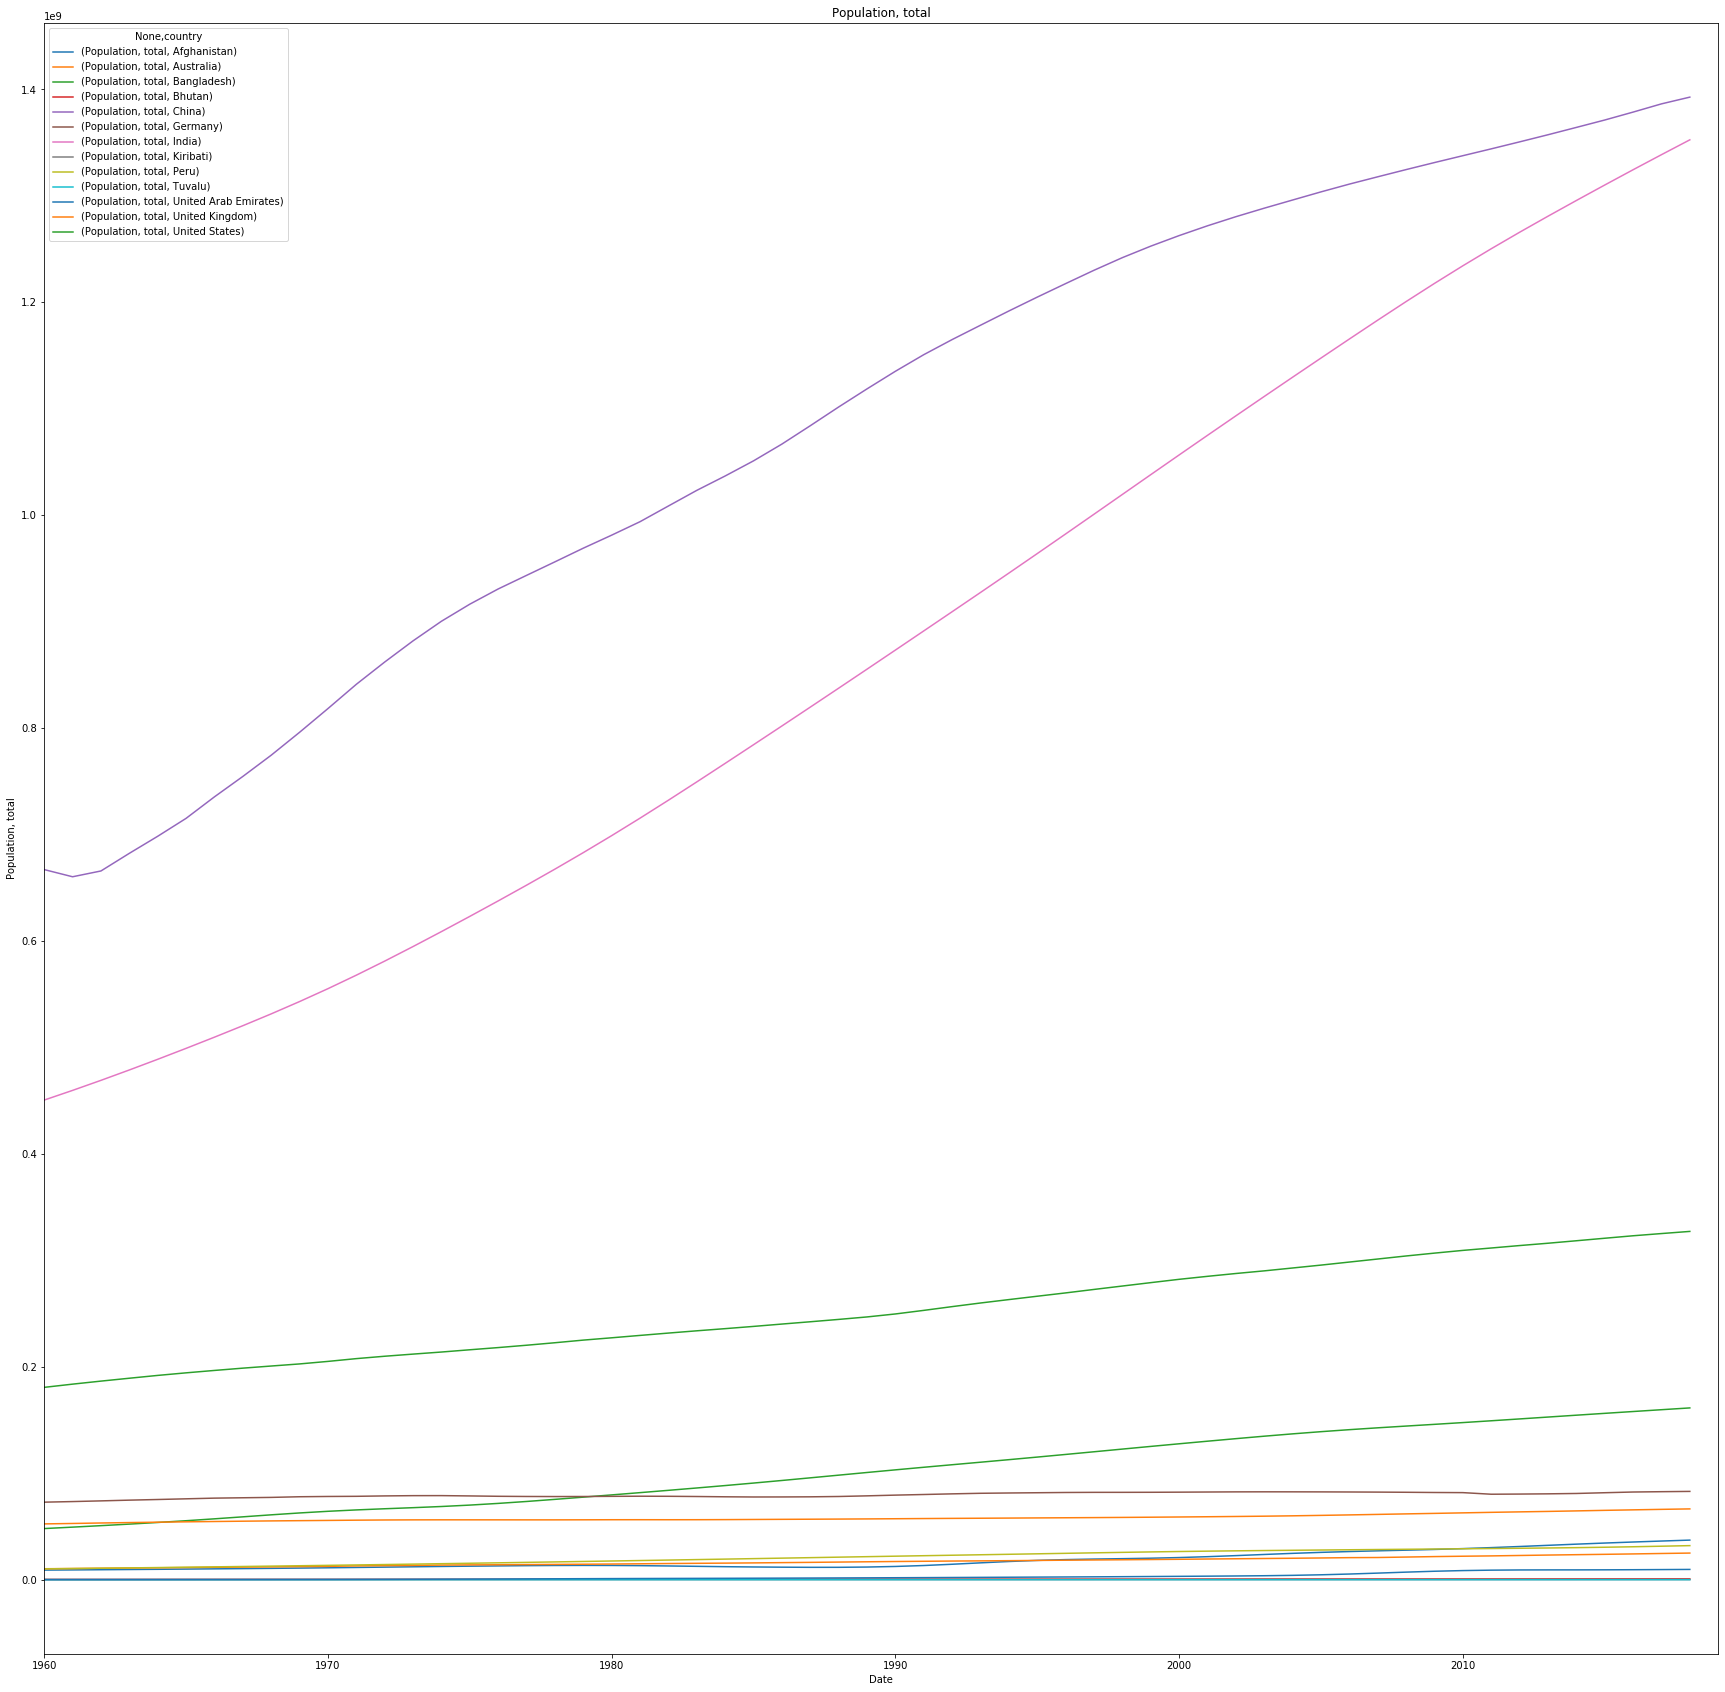

In [22]:
import wbdata
import pandas
import matplotlib.pyplot as plt
 
#set up the countries I want
countries = ["AFG","AUS","BTN","CHN","DEU","IND","PER","USA","ARE","GBR","TUV","KIR","BGD"]
 
#set up the indicator I want (just build up the dict if you want more than one)
indicators = {'SP.POP.TOTL':'Population, total'}
 
#grab indicators above for countires above and load into data frame
df = wbdata.get_dataframe(indicators, country=countries, convert_date=False)

#df is "pivoted", pandas' unstack fucntion helps reshape it into something plottable
dfu = df.unstack(level=0)

# a simple matplotlib plot with legend, labels and a title
dfu.plot(figsize=(30,30)); 
#plt.legend(loc='best'); 
plt.title("Population, total"); 
plt.xlabel('Date'); plt.ylabel('Population, total');

GDP with agriculture

In [32]:
%cd

C:\Users\prana


In [33]:
%cd ds project

C:\Users\prana\ds project


In [36]:
import pandas as pd

In [38]:
def read_multi_csv_data(files_list):
    """Read multi csv files from data_files directory and
    create df_dict dictionary containing separate data frames
    :param files_list: list of csv files
    :returns df_data: dictionary with string keys and data frames values"""
    df_dict = {}
    for f in files_list:
        d = pd.read_csv('../data_files/{0}'.format(f))
        df_dict[f.replace('.csv', '')] = d
    return df_dict

#read in files with PISA results, separate for every subject (all years)
pisa_data = pd.read_csv(['agriculture.csv'])

ValueError: Invalid file path or buffer object type: <class 'list'>

In [31]:
def load_from_wbdata(countries, indicators, year_from, year_to):
    """Create data frame for given list of countries, indicators and dates using World Bank API
    :param countries: list of codes
    :param indicators: dict {ind_code : ind_name}
    :param year_from: starting year
    :param year_to: ending year
    :returns df_data: multi index data frame
    """
    data_date = (datetime.datetime(year_from, 1, 1), datetime.datetime(year_to, 1, 1))
    df_data = wbdata.get_dataframe(indicators, country=countries, data_date=data_date, convert_date=False)
    return df_data

#get GDP PPP data (NY.GDP.PCAP.PP.KD - GDP per capita, PPP (constant 2011 international $))
gdp_ppp = load_from_wbdata(countries_codes, {'NV.AGR.TOTL.ZS':'agriculture'}, 2003, 2015)

NameError: name 'countries_codes' is not defined